# A Comparison between Classic and Quantum Random Walk

Codes for classic random walk is designed with Python and codes for quantum random walk is based on Qiskit.

In [1]:
# Import necessary libraries
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
import random

Below four pieces of codes are built for the concise of later major codes (Mainly qauntum codes).

In [2]:
# Make all the keys in a dictionary to have the same length by adding zeros in the front
# Example: if the longest keys has a length of 5, '0' will be implemented as '00000', '101' will become '00101'
def tidy(n, untidy):
    if len(untidy) != n:
        makeup = n - len(untidy)
        for temp in range(makeup):
            untidy = '0' + untidy
    return untidy

In [3]:
# Since the overall range of the distance one can be from the origin with n steps is [0, 2^n]
# this piece of code creates a dictionary from 0  to (2^n) - 1 to record data.
def creatDic(n):
    dec = np.linspace(0, (2 ** n) - 1, 2 ** n)
    binary = []
    for value in dec:
        binary.append(bin(int(value))[2:])
    for temp2 in range(len(binary)):
        binary[temp2] = tidy(n, binary[temp2])
    newdict = {key: 0 for key in binary}
    return newdict

In [4]:
# Record the result after running the simulation
def autoRenew(n, newresult):
    blankdict = creatDic(n)
    totalnumber = len(list(newresult.keys()))
    for temp2 in range(totalnumber):
        blankdict[list(newresult.keys())[temp2]] = newresult[list(newresult.keys())[temp2]]
    
    return blankdict

In [5]:
# Draw the updated results.
def draw(n, newresult):
    updatedict = autoRenew(n, newresult)
    plt.bar(np.linspace(0, (2 ** n) - 1, 2 ** n), updatedict.values())

## Classic Random Walk

Random Walk refers to the question: A man will either go right with probability p, or left with probability 1-p,
how many steps away from the origin will this man be after n steps?

Mathematically speaking, this question can be interpretated as the following statement. For every step, we take the value to be either $1$ or $-1$. Each step is independent from the previous steps. For every step x, the value and probability is:

|x value |Probability|
|:-----:|:-----:|
|1 |p|
|-1|1-p|

The expectation value for one step is:
$$
<x> = 1p + (-1)(1-p)
$$

In a non-baised situation, $p = 1-p = 0.5$, so the expectation value is supposed to be $0$ for one step, and thus $0$ for all the n steps. Below is a numerical simulation.

The classic algorithm is designed with two parameter: groupnumber and trialnumber. Trial number refers to how many steps the man take within one experiment (n in the above description). Group number refers to how many times we repeat the n-step experiment (that is, how many groups of data we collect).

<BarContainer object of 101 artists>

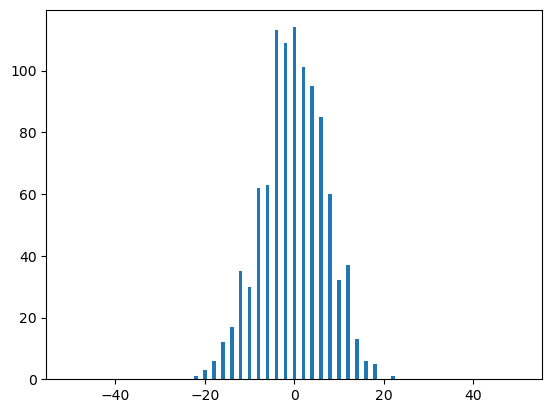

In [44]:
# Classic Random Walk
# The scales of the experiment can be varied by changing the trialnumber, the disrange should also be changed to
# np.linspace(-trialnumber, trialnumber, 2*trialnumber+1) for data recording. 
disrange = np.linspace(-50, 50, 101)
findistance = {key: 0 for key in disrange}
groupnumber = 1000
trialnumber = 50
for temp1 in range(groupnumber):
    distance = 0
    for temp2 in range(trialnumber):
        coin = random.randint(0, 1)
        if coin == 0:
            distance -= 1 
        elif coin == 1:
            distance += 1
    findistance[distance] += 1

plt.bar(findistance.keys(), findistance.values())

In [45]:
print(findistance)

{-50.0: 0, -49.0: 0, -48.0: 0, -47.0: 0, -46.0: 0, -45.0: 0, -44.0: 0, -43.0: 0, -42.0: 0, -41.0: 0, -40.0: 0, -39.0: 0, -38.0: 0, -37.0: 0, -36.0: 0, -35.0: 0, -34.0: 0, -33.0: 0, -32.0: 0, -31.0: 0, -30.0: 0, -29.0: 0, -28.0: 0, -27.0: 0, -26.0: 0, -25.0: 0, -24.0: 0, -23.0: 0, -22.0: 1, -21.0: 0, -20.0: 3, -19.0: 0, -18.0: 6, -17.0: 0, -16.0: 12, -15.0: 0, -14.0: 17, -13.0: 0, -12.0: 35, -11.0: 0, -10.0: 30, -9.0: 0, -8.0: 62, -7.0: 0, -6.0: 63, -5.0: 0, -4.0: 113, -3.0: 0, -2.0: 109, -1.0: 0, 0.0: 114, 1.0: 0, 2.0: 101, 3.0: 0, 4.0: 95, 5.0: 0, 6.0: 85, 7.0: 0, 8.0: 60, 9.0: 0, 10.0: 32, 11.0: 0, 12.0: 37, 13.0: 0, 14.0: 13, 15.0: 0, 16.0: 6, 17.0: 0, 18.0: 5, 19.0: 0, 20.0: 0, 21.0: 0, 22.0: 1, 23.0: 0, 24.0: 0, 25.0: 0, 26.0: 0, 27.0: 0, 28.0: 0, 29.0: 0, 30.0: 0, 31.0: 0, 32.0: 0, 33.0: 0, 34.0: 0, 35.0: 0, 36.0: 0, 37.0: 0, 38.0: 0, 39.0: 0, 40.0: 0, 41.0: 0, 42.0: 0, 43.0: 0, 44.0: 0, 45.0: 0, 46.0: 0, 47.0: 0, 48.0: 0, 49.0: 0, 50.0: 0}


As the number of trials increases, the distribution still looks like a bell shape, but the distribution will become more spread with a lower and lower frequency at center. The below graph is a comparison between trial number 50, 100, 200, 500, and 1000.

For save of memory and efficiency, the data is collected in the following way (not shown in codes):
1. Find the minimum number (usually negative) and maximum number (usually positive) that has a non-zero frequency. Denote them as $R_{min}$ and $R_{max}$.
2. Compare the absolute value of $R_{min}$ and $R_{max}$, denote $l = max\{|R_{min}|, |R_{min}|\}$
3. Collect the data in the dictionary whose key is within the value of $[-l, l]$

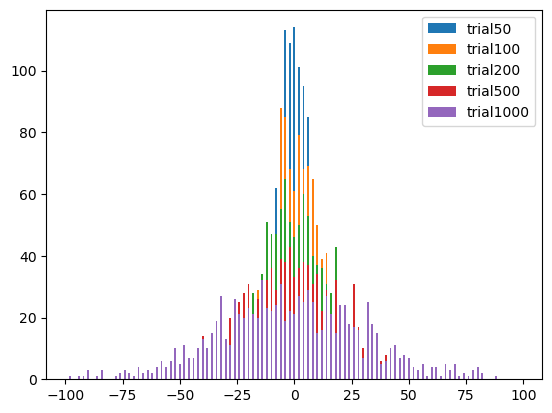

In [46]:
# This is a comparion between the distributino of different trial numbers (50, 100, 200, 500, 1000)
trial50 = {-22.0: 1, -21.0: 0, -20.0: 3, -19.0: 0, -18.0: 6, -17.0: 0, -16.0: 12, -15.0: 0, -14.0: 17, -13.0: 0, -12.0: 35, -11.0: 0, -10.0: 30, -9.0: 0, -8.0: 62, -7.0: 0, -6.0: 63, -5.0: 0, -4.0: 113, -3.0: 0, -2.0: 109, -1.0: 0, 0.0: 114, 1.0: 0, 2.0: 101, 3.0: 0, 4.0: 95, 5.0: 0, 6.0: 85, 7.0: 0, 8.0: 60, 9.0: 0, 10.0: 32, 11.0: 0, 12.0: 37, 13.0: 0, 14.0: 13, 15.0: 0, 16.0: 6, 17.0: 0, 18.0: 5, 19.0: 0, 20.0: 0, 21.0: 0, 22.0: 1}
trial100 = {-32.0: 1, -31.0: 0, -30.0: 0, -29.0: 0, -28.0: 0, -27.0: 0, -26.0: 4, -25.0: 0, -24.0: 1, -23.0: 0, -22.0: 6, -21.0: 0, -20.0: 13, -19.0: 0, -18.0: 17, -17.0: 0, -16.0: 29, -15.0: 0, -14.0: 32, -13.0: 0, -12.0: 35, -11.0: 0, -10.0: 40, -9.0: 0, -8.0: 40, -7.0: 0, -6.0: 88, -5.0: 0, -4.0: 85, -3.0: 0, -2.0: 68, -1.0: 0, 0.0: 61, 1.0: 0, 2.0: 79, 3.0: 0, 4.0: 68, 5.0: 0, 6.0: 69, 7.0: 0, 8.0: 65, 9.0: 0, 10.0: 50, 11.0: 0, 12.0: 39, 13.0: 0, 14.0: 41, 15.0: 0, 16.0: 19, 17.0: 0, 18.0: 16, 19.0: 0, 20.0: 11, 21.0: 0, 22.0: 7, 23.0: 0, 24.0: 6, 25.0: 0, 26.0: 3, 27.0: 0, 28.0: 4, 29.0: 0, 30.0: 3, 31.0: 0, 32.0: 0}
trial200 = {-40.0: 0, -39.0: 0, -38.0: 2, -37.0: 0, -36.0: 2, -35.0: 0, -34.0: 3, -33.0: 0, -32.0: 3, -31.0: 0, -30.0: 6, -29.0: 0, -28.0: 12, -27.0: 0, -26.0: 12, -25.0: 0, -24.0: 10, -23.0: 0, -22.0: 11, -21.0: 0, -20.0: 21, -19.0: 0, -18.0: 28, -17.0: 0, -16.0: 24, -15.0: 0, -14.0: 34, -13.0: 0, -12.0: 51, -11.0: 0, -10.0: 47, -9.0: 0, -8.0: 47, -7.0: 0, -6.0: 55, -5.0: 0, -4.0: 65, -3.0: 0, -2.0: 51, -1.0: 0, 0.0: 46, 1.0: 0, 2.0: 50, 3.0: 0, 4.0: 60, 5.0: 0, 6.0: 53, 7.0: 0, 8.0: 40, 9.0: 0, 10.0: 37, 11.0: 0, 12.0: 36, 13.0: 0, 14.0: 31, 15.0: 0, 16.0: 28, 17.0: 0, 18.0: 43, 19.0: 0, 20.0: 21, 21.0: 0, 22.0: 19, 23.0: 0, 24.0: 13, 25.0: 0, 26.0: 9, 27.0: 0, 28.0: 7, 29.0: 0, 30.0: 6, 31.0: 0, 32.0: 3, 33.0: 0, 34.0: 4, 35.0: 0, 36.0: 4, 37.0: 0, 38.0: 3, 39.0: 0, 40.0: 1}
trial500 = {-52.0: 2, -51.0: 0, -50.0: 3, -49.0: 0, -48.0: 5, -47.0: 0, -46.0: 6, -45.0: 0, -44.0: 2, -43.0: 0, -42.0: 4, -41.0: 0, -40.0: 14, -39.0: 0, -38.0: 6, -37.0: 0, -36.0: 8, -35.0: 0, -34.0: 8, -33.0: 0, -32.0: 10, -31.0: 0, -30.0: 9, -29.0: 0, -28.0: 20, -27.0: 0, -26.0: 14, -25.0: 0, -24.0: 25, -23.0: 0, -22.0: 28, -21.0: 0, -20.0: 31, -19.0: 0, -18.0: 19, -17.0: 0, -16.0: 26, -15.0: 0, -14.0: 32, -13.0: 0, -12.0: 32, -11.0: 0, -10.0: 36, -9.0: 0, -8.0: 29, -7.0: 0, -6.0: 39, -5.0: 0, -4.0: 38, -3.0: 0, -2.0: 43, -1.0: 0, 0.0: 33, 1.0: 0, 2.0: 36, 3.0: 0, 4.0: 38, 5.0: 0, 6.0: 37, 7.0: 0, 8.0: 31, 9.0: 0, 10.0: 34, 11.0: 0, 12.0: 22, 13.0: 0, 14.0: 29, 15.0: 0, 16.0: 19, 17.0: 0, 18.0: 32, 19.0: 0, 20.0: 19, 21.0: 0, 22.0: 17, 23.0: 0, 24.0: 18, 25.0: 0, 26.0: 31, 27.0: 0, 28.0: 17, 29.0: 0, 30.0: 10, 31.0: 0, 32.0: 17, 33.0: 0, 34.0: 15, 35.0: 0, 36.0: 5, 37.0: 0, 38.0: 6, 39.0: 0, 40.0: 8, 41.0: 0, 42.0: 6, 43.0: 0, 44.0: 6, 45.0: 0, 46.0: 3, 47.0: 0, 48.0: 7, 49.0: 0, 50.0: 7, 51.0: 0, 52.0: 2}
trial1000 = {-98.0: 1, -97.0: 0, -96.0: 0, -95.0: 0, -94.0: 1, -93.0: 0, -92.0: 1, -91.0: 0, -90.0: 3, -89.0: 0, -88.0: 0, -87.0: 0, -86.0: 1, -85.0: 0, -84.0: 3, -83.0: 0, -82.0: 0, -81.0: 0, -80.0: 0, -79.0: 0, -78.0: 1, -77.0: 0, -76.0: 2, -75.0: 0, -74.0: 3, -73.0: 0, -72.0: 2, -71.0: 0, -70.0: 1, -69.0: 0, -68.0: 4, -67.0: 0, -66.0: 2, -65.0: 0, -64.0: 3, -63.0: 0, -62.0: 2, -61.0: 0, -60.0: 4, -59.0: 0, -58.0: 6, -57.0: 0, -56.0: 4, -55.0: 0, -54.0: 6, -53.0: 0, -52.0: 10, -51.0: 0, -50.0: 5, -49.0: 0, -48.0: 11, -47.0: 0, -46.0: 7, -45.0: 0, -44.0: 7, -43.0: 0, -42.0: 10, -41.0: 0, -40.0: 13, -39.0: 0, -38.0: 10, -37.0: 0, -36.0: 15, -35.0: 0, -34.0: 19, -33.0: 0, -32.0: 27, -31.0: 0, -30.0: 13, -29.0: 0, -28.0: 11, -27.0: 0, -26.0: 26, -25.0: 0, -24.0: 21, -23.0: 0, -22.0: 20, -21.0: 0, -20.0: 23, -19.0: 0, -18.0: 21, -17.0: 0, -16.0: 20, -15.0: 0, -14.0: 32, -13.0: 0, -12.0: 23, -11.0: 0, -10.0: 22, -9.0: 0, -8.0: 24, -7.0: 0, -6.0: 31, -5.0: 0, -4.0: 19, -3.0: 0, -2.0: 22, -1.0: 0, 0.0: 21, 1.0: 0, 2.0: 27, 3.0: 0, 4.0: 25, 5.0: 0, 6.0: 29, 7.0: 0, 8.0: 25, 9.0: 0, 10.0: 15, 11.0: 0, 12.0: 16, 13.0: 0, 14.0: 27, 15.0: 0, 16.0: 21, 17.0: 0, 18.0: 15, 19.0: 0, 20.0: 24, 21.0: 0, 22.0: 24, 23.0: 0, 24.0: 18, 25.0: 0, 26.0: 17, 27.0: 0, 28.0: 16, 29.0: 0, 30.0: 7, 31.0: 0, 32.0: 25, 33.0: 0, 34.0: 18, 35.0: 0, 36.0: 15, 37.0: 0, 38.0: 5, 39.0: 0, 40.0: 6, 41.0: 0, 42.0: 10, 43.0: 0, 44.0: 11, 45.0: 0, 46.0: 7, 47.0: 0, 48.0: 8, 49.0: 0, 50.0: 7, 51.0: 0, 52.0: 4, 53.0: 0, 54.0: 3, 55.0: 0, 56.0: 5, 57.0: 0, 58.0: 1, 59.0: 0, 60.0: 4, 61.0: 0, 62.0: 4, 63.0: 0, 64.0: 1, 65.0: 0, 66.0: 5, 67.0: 0, 68.0: 3, 69.0: 0, 70.0: 5, 71.0: 0, 72.0: 1, 73.0: 0, 74.0: 2, 75.0: 0, 76.0: 1, 77.0: 0, 78.0: 3, 79.0: 0, 80.0: 4, 81.0: 0, 82.0: 2, 83.0: 0, 84.0: 0, 85.0: 0, 86.0: 0, 87.0: 0, 88.0: 1, 89.0: 0, 90.0: 0, 91.0: 0, 92.0: 0, 93.0: 0, 94.0: 0, 95.0: 0, 96.0: 0, 97.0: 0, 98.0: 0}

plt.bar(trial50.keys(), trial50.values())
plt.bar(trial100.keys(), trial100.values())
plt.bar(trial200.keys(), trial200.values())
plt.bar(trial500.keys(), trial500.values())
plt.bar(trial1000.keys(), trial1000.values())
plt.legend(['trial50', 'trial100', 'trial200', 'trial500', 'trial1000'])

## Quantum Random Walk

### Generalized Description

The only difference between the quantum random walk and the classic random walk, when generating, is supposed to be that the random number is generated through H gate, a real random number, instead of the psuedo-random number in python. However, the result is surprisingly different from expected. I haven't had a mathematical expression to explain the result analytically, but I do have the codes to numerically give us a peak at the 'strange' property of quantum random walk.

For quantum codes, we need a different way to count the distance from the origin. We need $n$ qubits to represent distance within the range $[0, 2^n - 1]$. We also need an increament gate and a decrement gate separately. Decrement gate is different from increment gate only in that the decrement gate detect 0s while the increment gate detects 1s. Below is an example of 3-qubit increment gate. This gate can record the distance ranging $[0, 7]$.

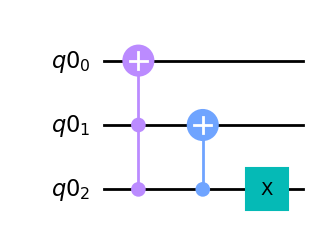

In [47]:
qt = QuantumRegister(3)
qc = QuantumCircuit(qt)


qc.ccx(qt[2], qt[1], qt[0])
qc.cx(qt[2], qt[1])
qc.x(qt[2])

qc.draw('mpl')

This is an example of how this circuit works, suppose the circuit starts with $|011>$, after the circuit the result should be $|100>$
1. After CCX Gate: $|111>$
2. After CX Gate: $|101>$
3. After X Gate: $|100>$

With this circuit, if the counter reaches the maximum boundary, it will return to the lowest value, like the periodic boundary conditions. Below is an example of boundary condition $|111>$, after the circuit, it should become $|000>$.
1. After CCX Gate: $|011>$
2. After CX Gate: $|001>$
3. After X Gate: $|000>$

Simply by adding an X gate before and after every control qubit in the increment gate, we can get the decrement gate. The circuit is given as below.

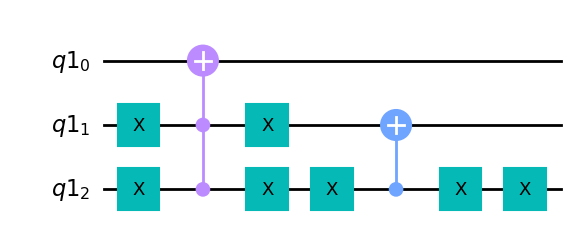

In [48]:
qt = QuantumRegister(3)
qc = QuantumCircuit(qt)

qc.x(qt[2])
qc.x(qt[1])
qc.ccx(qt[2], qt[1], qt[0])
qc.x(qt[2])
qc.x(qt[1])
qc.x(qt[2])
qc.cx(qt[2], qt[1])
qc.x(qt[2])
qc.x(qt[2])

qc.draw('mpl')

This is an example of how this circuit works, suppose the circuit starts with $|010>$, after the circuit the result should be $|001>$
1. After 0-detecting CCX Gate: $|010>$
2. After 0-detecting CX Gate: $|000>$
3. After X Gate: $|001>$

With this circuit, if the counter reaches the minimum boundary, it will return to the highest value like the periodic boundary conditions. Below is an example of boundary condition $|000>$, after the circuit, it should become $|111>$.
1. After 0-detecting CCX Gate: $|100>$
2. After 0-detecting CX Gate: $|110>$
3. After X Gate: $|111>$

While implementing the code, the increasement gate and decreasement gates are to implemented with subcircuit so that it can added a control qubit and together added to the circuit. A generalized (psuedo-)code for increment and decreament gate is given with n qubits.

In [ ]:
sub_q1 = QuantumRegister(n)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_cir1.mcx([sub_q1[n - 1], sub_q1[n - 2], ..., sub_q1[2], sub_q1[1]], sub_q1[0])
sub_cir1.mcx([sub_q1[n - 1], sub_q1[n - 2], ..., sub_q1[3], sub_q1[2]], sub_q1[1])
sub_cir1.mcx([sub_q1[n - 1], sub_q1[n - 2], ..., sub_q1[4], sub_q1[3]], sub_q1[2])
...
sub_circ1.ccx(sub_q1[n - 1], sub_q1[n - 2], sub_q1[n - 3])
sub_circ1.cx(sub_q1[n - 1], sub_q1[n - 2])
sub_circ1.x(sub_q1[n - 1])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(n)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')



for temp1 in range(0, n - 2)
    sub_circ2.x(sub_q2[temp1])
sub_circ2.mcx([sub_q1[n - 1], sub_q1[n - 2], ..., sub_q1[2], sub_q1[1]], sub_q1[0])
for temp1 in range(0, n - 2)
    sub_circ2.x(sub_q2[temp1])
    
for temp1 in range(1, n - 2)
    sub_circ2.x(sub_q2[temp1])
sub_circ2.mcx([sub_q1[n - 1], sub_q1[n - 2], ..., sub_q1[3], sub_q1[2]], sub_q1[1])
for temp1 in range(1, n - 2)
    sub_circ2.x(sub_q2[temp1])

...

sub_circ2.x(sub_q2[n - 1])
sub_circ2.x(sub_q2[n - 2])
sub_circ2.ccx(sub_q1[n - 1], sub_q1[n - 2], sub_q1[n - 3])
sub_circ2.x(sub_q2[n - 1])
sub_circ2.x(sub_q2[n - 2])

sub_circ2.x(sub_q2[n - 1])
sub_circ2.cx(sub_q2[n - 1], sub_q2[n - 2])
sub_circ2.x(sub_q2[n - 1])

sub_circ2.x(sub_q2[n - 1])

decr = sub_circ2.to_gate().control(1)

Different from the classic case, we now use an H gate to generate real random numbers. The way we achieve that is by adding a new qubit, initialized with an H gate. The control gate mentiond above in increament and decreament gate will also be attached to this gate. A generalized (psuedo-) code looks like the following.

In [ ]:
# Assume the increment gate and decrement gate is defined as above
qr = QuantumRegister(n + 1) # Initialize the Qubits
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

qc.x(0) # Move the origin to the center, will be explained later with example
qc.h(n) # Set the 'coin'

# Attach the increment and decrement gate
qc.append(incr, [qr[n], qr[0], qr[1], qr[2], ..., qr[n -2], qr[n -1]])

qc.x(n)
qc.append(decr, [qr[n], qr[0], qr[1], qr[2], ..., qr[n -2], qr[n -1]])
qc.x(n)

# Measure the counter
qc.measure([qr[n - 1], qr[n - 2], ..., qr[2], qr[1], qr[0]], cr) 

In [ ]:
# Get the results
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
draw(n, results)

The above codes are for one-step quantum random walk. The step is defined as how many times the increment and decrement gates are repeated. A multi-step codes can be implemented in the following way:

In [ ]:
# Assume the increment gate and decrement gate is defined as above
qr = QuantumRegister(n + 1) # Initialize the Qubits
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

qc.x(0) # Move the origin to the center, will be explained later with example
qc.h(n) # Set the 'coin'

# Attach the increment and decrement gate with more than one steps.
for temp2 in range(stepnumber):
    qc.append(incr, [qr[n], qr[0], qr[1], qr[2], ..., qr[n -2], qr[n -1]])

    qc.x(n)
    qc.append(decr, [qr[n], qr[0], qr[1], qr[2], ..., qr[n -2], qr[n -1]])
    qc.x(n)

# Measure the counter
qc.measure([qr[n - 1], qr[n - 2], ..., qr[2], qr[1], qr[0]], cr) 

# Get the results
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

### Example with maximum distance 32 and various step numbers

Let us start with an easy example of maximum distance 8

In [50]:
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

sub_q1 = QuantumRegister(3)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(3)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])

decr = sub_circ2.to_gate().control(1)


qc.h(3)
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.measure([qr[2], qr[1], qr[0]], cr)

# Get the results
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

{'111': 522, '001': 502}


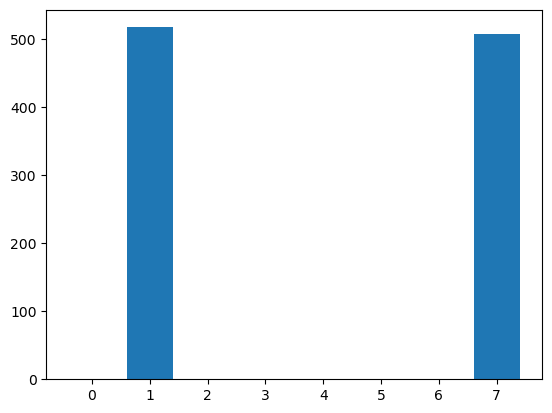

In [57]:
# Get the results
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
draw(3, results)

It seems that the quantum random walk will return us a paranormal distribution instead of a normal distribution. However, the step size seems puzzling. We start with 0. Due to the periodic boundary condition mentioned above, $0$ decreases by $1$ will return $7$. In order to make the graph clearer, we add a not gate at the first qubit, qr[0], which will move the center to the middle $2^{n-1}$, in this case 4. This is also why n qubits for counter will only allow a maximum distance of $2^{n-1}$. The modified result is shown as below:

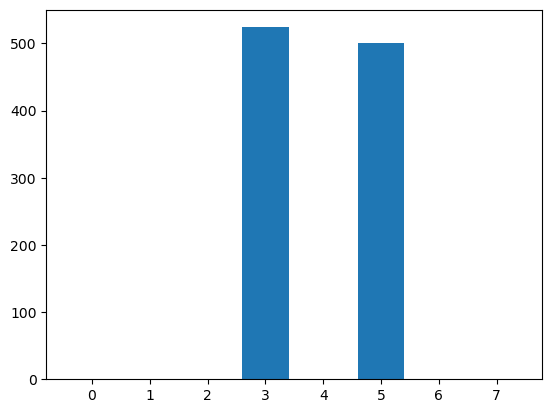

In [58]:
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

sub_q1 = QuantumRegister(3)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(3)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])

decr = sub_circ2.to_gate().control(1)

qc.x(0)
qc.h(3)
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.measure([qr[2], qr[1], qr[0]], cr)

# Get the results
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
draw(3, results)

In this case, the distance away from the origin is much more clear. It is indeed showing a paranormal distribution. The simulation is run on a simulator. For a real quantum computer, the noise will make the distribution more smooth.

In order to explore the relationship between distribution and step numbers, we try different numbers.

In [61]:
# With more steps

In [62]:
# n = 6 incr and decr gates
sub_q1 = QuantumRegister(6)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.mcx([sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2], sub_q1[1]], sub_q1[0])
sub_circ1.mcx([sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2]], sub_q1[1])
sub_circ1.mcx([sub_q1[5], sub_q1[4], sub_q1[3]], sub_q1[2])
sub_circ1.ccx(sub_q1[5], sub_q1[4], sub_q1[3])
sub_circ1.cx(sub_q1[5], sub_q1[4])
sub_circ1.x(sub_q1[5])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(6)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')

sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])
sub_circ2.mcx([sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2], sub_q2[1]], sub_q2[0])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])

sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.mcx([sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2]], sub_q2[1])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.mcx([sub_q2[5], sub_q2[4], sub_q2[3]], sub_q2[2])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])

sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.ccx(sub_q2[5], sub_q2[4], sub_q2[3])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])

sub_circ2.x(sub_q2[5])
sub_circ2.cx(sub_q2[5], sub_q2[4])
sub_circ2.x(sub_q2[5])

sub_circ2.x(sub_q2[5])

decr = sub_circ2.to_gate().control(1)

In [63]:
qr = QuantumRegister(7) 
cr = ClassicalRegister(6)
qc = QuantumCircuit(qr, cr)

qc.x(0)
qc.h(6)

for temp3 in range(30):  # The step number can be changed here.
    qc.append(incr, [qr[6], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5]]) 
    qc.x(6)
    qc.append(decr, [qr[6], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5]])
    qc.x(6)

In [64]:
qc.measure([qr[5], qr[4], qr[3], qr[2], qr[1], qr[0]], cr)

In [103]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

{'111110': 497, '000010': 527}


([<matplotlib.axis.XTick at 0x21f2ed44ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

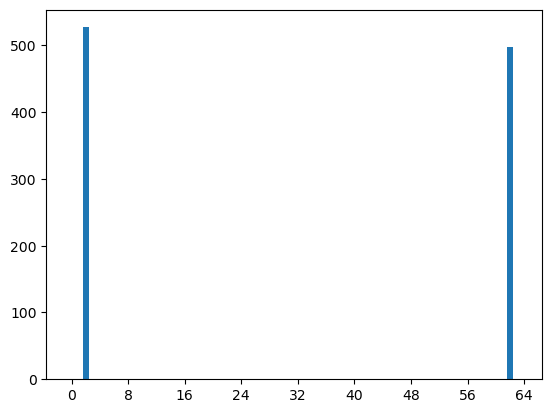

In [104]:
draw(6, results)
plt.xticks(np.linspace(0, 64, 9))

By experimenting differnet step numbers, we find out that for the paranormal distribution, the peak's distance from the origin is equal to the origin. A comparion is given below (step number = 4, 8, 12, 16, 20, 24)

(Note: This is a filed graph. I am working on how to fix it.)

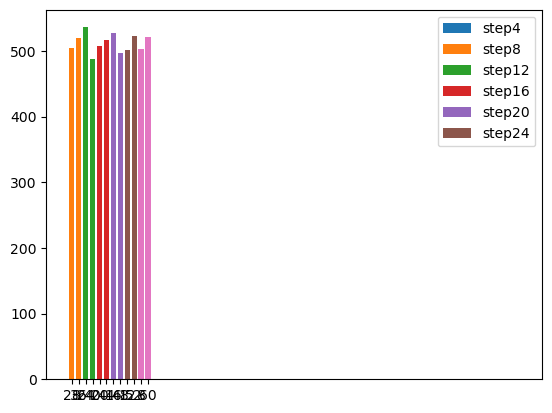

In [74]:
# This is a comparion between the distributino of different step numbers (4, 8, 12, 16, 20, 24)
# Data are collected with the above example codes
# The keys' values in the dictionary have been transformed into decimal number for demonstration convenience
step4 = {'28': 505, '36': 519}
step8 = {'24': 536, '40': 488}
step12 = {'20': 508, '44': 516}
step16 = {'16': 527, '48': 497}
step20 = {'12': 502, '52': 522}
step24 = {'8': 503, '60': 521}


plt.bar(empty.keys(), empty.values())
plt.bar(step4.keys(), step4.values())
plt.bar(step8.keys(), step8.values())
plt.bar(step12.keys(), step12.values())
plt.bar(step16.keys(), step16.values())
plt.bar(step20.keys(), step20.values())
plt.bar(step24.keys(), step24.values())
plt.legend(['step4', 'step8', 'step12', 'step16', 'step20', 'step24'])

## Biased Quantum Random Walk

Biased Random Walk is really not much different from the one we have just discussed. The only difference is the probability p to go right is no longer 0.5. A classic algorithm and examples are given:

<BarContainer object of 101 artists>

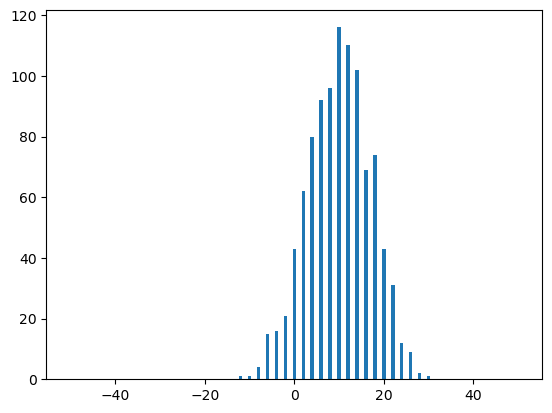

In [75]:
# Classic Codes
disrange = np.linspace(-50, 50, 101)
findistance = {key: 0 for key in disrange}
groupnumber = 1000
trialnumber = 50
for temp1 in range(groupnumber):
    distance = 0
    for temp2 in range(trialnumber):
        coin = random.randint(1, 100)
        if coin <=  40: # Suppose the possibility to go right is p (in percent), the number here and below is 100 - p
            distance -= 1 
        elif coin >= 40:
            distance += 1
    findistance[distance] += 1

plt.bar(findistance.keys(), findistance.values())

The classic code return a normal distribution with center line moving to the right as expected.

For quantum codes, it is a little bit more complicated. We need to use U gate to complete the probability, not the H gate. This is the mathematics procedures to get the correct parameter for the U gates.

The qubit is initialized as 0, which has a vector form
$
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$
and the U gate in general form
$
\begin{pmatrix}
\cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda}\cos(\frac{\theta}{2})
\end{pmatrix}
$
By performing matrix multiplication, we can get the general form of a vector:

$$
|\psi\rangle
=
\begin{pmatrix}
\cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda}\cos(\frac{\theta}{2})
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=
\begin{pmatrix}
\cos(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})
\end{pmatrix}
$$

We want the possibility to go right(take a value 1) is P and the possibility to go left(take a value 0) is 1-P, so we need the qubit to be measured as 1 with possibility P, and therefore possibilty amplitude $\sqrt{P}$, meaning that:
$$
\begin{pmatrix}
\cos(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})
\end{pmatrix}
=
\begin{pmatrix}
\sqrt{1-P} \\
\sqrt{P}
\end{pmatrix}
$$
The equation gives us that
$$
\theta = 2\arccos(\sqrt{1-P})
$$
while $\phi$ and $\lambda$ can be any numbers. As a result, we need a U gate that looks like this $U(2\arccos(\sqrt{1-P}), 0, 0)$

For now, I will skip the generalized part since it is so similiar to the non-biased case, only changing qc.h(n) to qc.u(2 * np.arccos(np.sqrt(1 - P)), 0, 0, qr[n]). P stands for the possibility to go right.

Below is a 2-step example of biased random walk. The possibility to go right is 0.6. Circuit with different possibility and step numbers can be produces with experience stated before.

In [77]:
# P is 40(0) - 60(1)
# Method 1: Reset and Reinitialize U gate
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)


sub_q1 = QuantumRegister(3)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(3)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])

decr = sub_circ2.to_gate().control(1)

qc.x(0)
qc.u(2 * np.arccos(np.sqrt(0.4)), 0, 0, qr[3])
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)

qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)

In [78]:
qc.measure([qr[2], qr[1], qr[0]], cr)

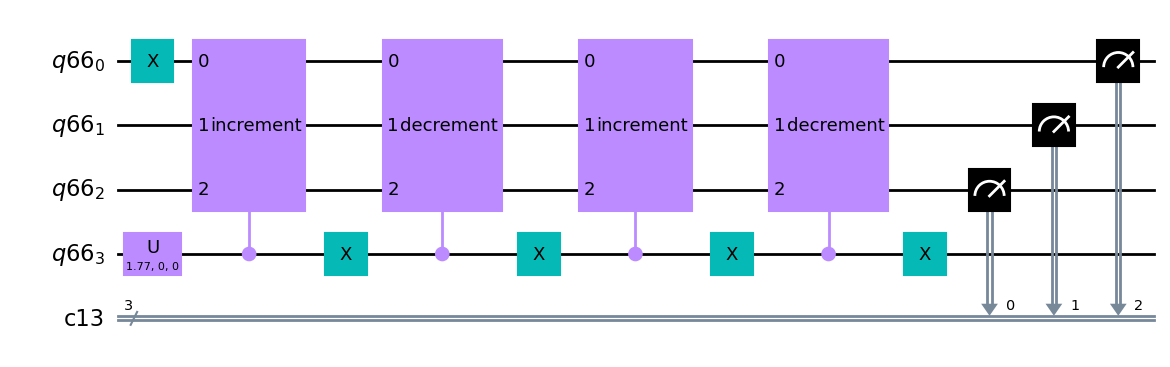

In [79]:
qc.draw('mpl')

In [80]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

{'010': 411, '110': 613}


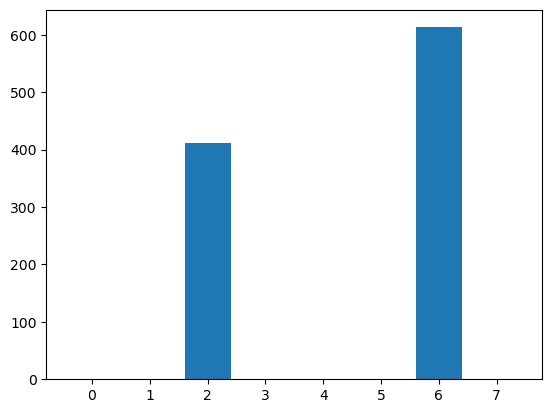

In [81]:
draw(3, results)

The quantum code return the distribution expected.

## 2-step Biased Quantum Random Walk, each step with different probability

This method is discussed as an experiment of solving master equation with quantum random walks.For simplicity, when discussing the question, the maximum distance is restricted to 4 and the step number is restricted to 2 (each step with different possibility to go left and right).

As usual, we give the classic algorithm as a 'control group'. The code is different from the baised one in the way that, after each 'coin toss'. The coin value will be compared twice (each with different possibility) to make moves.

<BarContainer object of 201 artists>

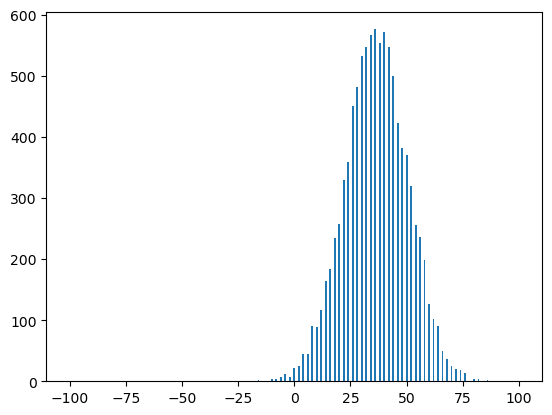

In [6]:
# Classic Version
# First step is 40(0) - 60(1), second step is 30(0) - 70(1)
disrange = np.linspace(-100, 100, 201)
findistance = {key: 0 for key in disrange}
groupnumber = 10000
trialnumber = 100
for temp1 in range(groupnumber):
    distance = 0
    for temp2 in range(trialnumber):
        coin = random.randint(0, 10)
        if coin <= 4: # Probability to go right is 100% - 40% = 60%
            distance -= 1 
        elif coin > 4:
            distance += 1
        
        coin = random.randint(0, 10)
        if coin <= 3: # Probability to go right is 100% - 30% = 70%
            distance -= 1
        elif coin > 3:
            distance += 1
    
    findistance[distance] += 1

plt.bar(findistance.keys(), findistance.values())

For quantum circuits, we give two methods to implement the task.

First, initialize the increment and decrement gate as usual.

In [7]:
sub_q1 = QuantumRegister(3)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

incr = sub_circ1.to_gate().control(1)


sub_q2 = QuantumRegister(3)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[2])

decr = sub_circ2.to_gate().control(1)

For the first method, after we make one step, we reset the 'coin qubit' and reinitialize it with our new possibility. Codes and results follows:

In [8]:
# First step is 40(0) - 60(1), second step is 30(0) - 70(1)
# Method 1: Reset and Reinitialize U gate
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)


qc.x(0)
qc.u(2 * np.arccos(np.sqrt(0.4)), 0, 0, qr[3])
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)

qc.reset(3)
qc.u(2 * np.arccos(np.sqrt(0.3)), 0, 0, qr[3])
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)

In [9]:
qc.measure([qr[2], qr[1], qr[0]], cr)

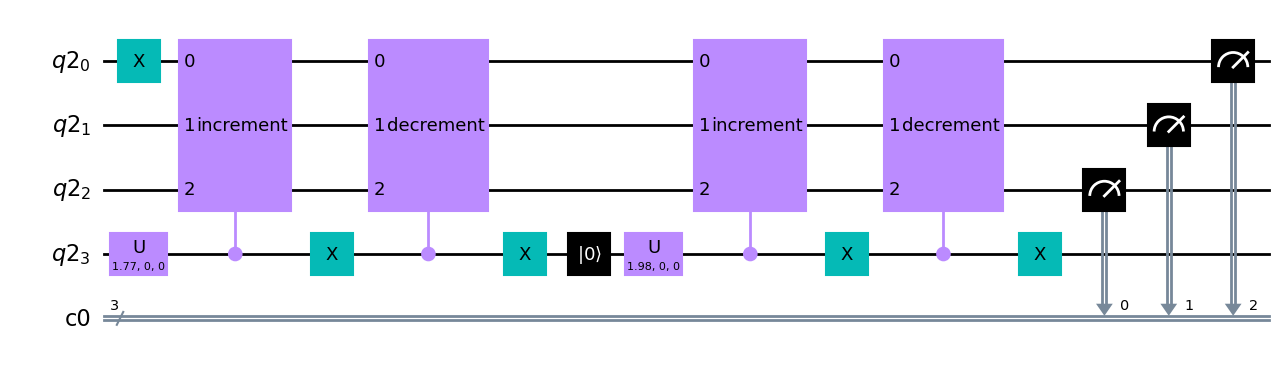

In [10]:
qc.draw('mpl')

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

{'110': 428, '100': 481, '010': 115}


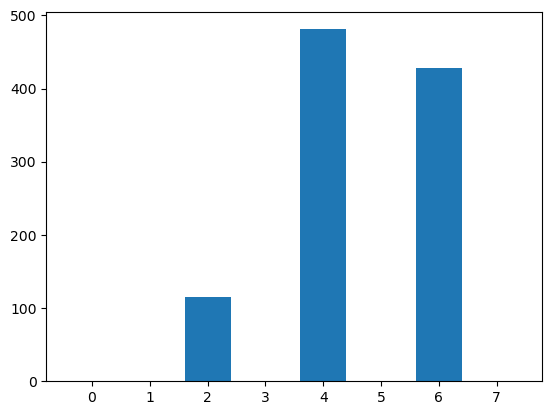

In [12]:
draw(3, results)

For the second method, We use two qubits to represent two different probabilities. In this way, we may avoid the errors brought in by the reset qubit (It is also possible that the reset move will NOT bring errors to the qubit).

In [13]:
# First step is 40(0) - 60(1), second step is 30(0) - 70(1)
# Method 2: Different U gates on different qubits
qr = QuantumRegister(5)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)


qc.x(0)
qc.u(2 * np.arccos(np.sqrt(0.4)), 0, 0, qr[3])
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3)

qc.u(2 * np.arccos(np.sqrt(0.3)), 0, 0, qr[4])
qc.append(incr, [qr[4], qr[0], qr[1], qr[2]])
qc.x(4)
qc.append(decr, [qr[4], qr[0], qr[1], qr[2]])
qc.x(4)

In [14]:
qc.measure([qr[2], qr[1], qr[0]], cr)

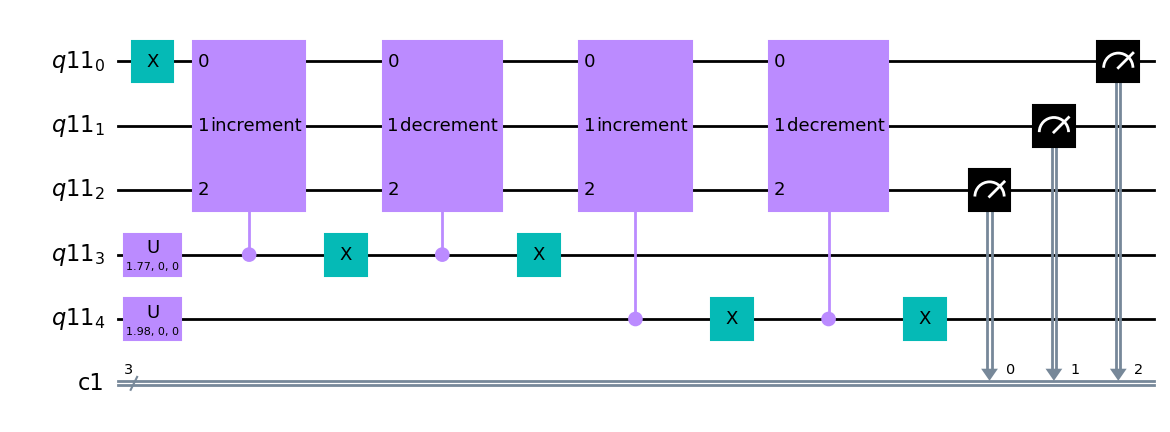

In [15]:
qc.draw('mpl')

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
results = job.result().get_counts(qc)
print(results)

{'100': 436, '110': 459, '010': 129}


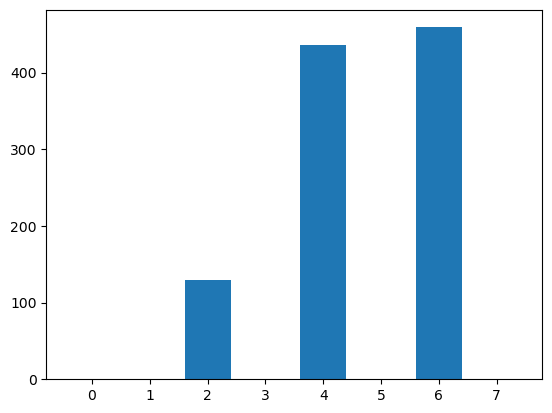

In [17]:
draw(3, results)